# $t$-Tests

<img src="https://imgs.xkcd.com/comics/correlation_2x.png" alt="xkcd" width="500"/>

In [22]:
# Numerical arrays.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

## Normal Data

[numpy.random.normal](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html)



In [23]:
# # Group A.
# group_a = np.random.normal(5, 2, 30)

# # Group B.
# group_b = np.random.normal(5, 2, 30)

# try:
# group_a = np.random.normal(7, 2, 30) # mean, std, n
# group_b = np.random.normal(3, 2, 30)

# try:
group_a = np.random.normal(0.07, 0.02, 30) # mean, std, n
group_b = np.random.normal(0.03, 0.02, 30)

# Show.
group_a, group_b

(array([0.09729786, 0.06786084, 0.0925708 , 0.08162908, 0.09663693,
        0.08370923, 0.04635582, 0.06244022, 0.03788145, 0.07166654,
        0.10260123, 0.07644518, 0.08328673, 0.0971932 , 0.06132809,
        0.06329945, 0.03935047, 0.09707454, 0.06176229, 0.04011296,
        0.05799981, 0.05169614, 0.08938705, 0.07202315, 0.07465569,
        0.07364417, 0.06612997, 0.07549722, 0.08205486, 0.06295977]),
 array([ 0.03269332,  0.01286714,  0.04049046,  0.05444547,  0.01901301,
         0.02677459,  0.01734078,  0.02194421,  0.0358588 ,  0.02575427,
         0.05180274,  0.06112687, -0.02438945,  0.03097635,  0.03766759,
         0.02523373,  0.05064698,  0.03002067,  0.06259775,  0.05405757,
         0.05283324,  0.03506428,  0.04267582, -0.00255147,  0.04046437,
         0.05854509,  0.05581226,  0.0345443 ,  0.05417853,  0.04123951]))

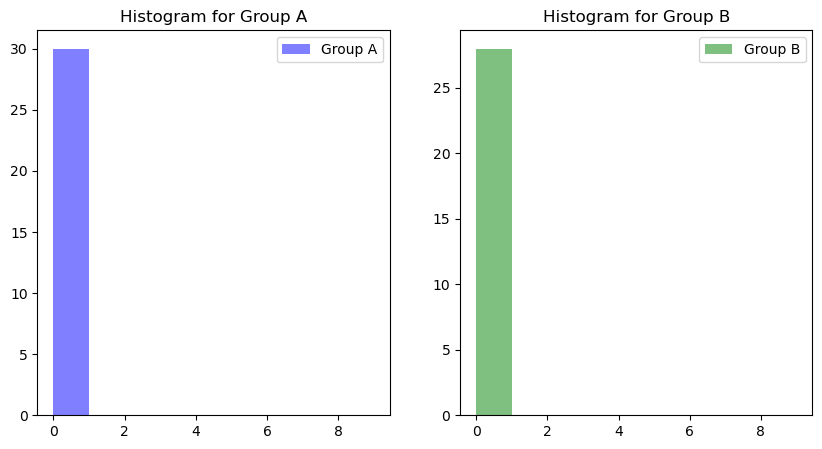

In [24]:
# Create an empty data frame.
#fig, ax = plt.subplots(2,1) # dont have to do subplot if just 1 plot, but can do 2 plots on 1 figure
# try:
#fig, ax = plt.subplots(1,2)
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Create histogram.
ax[0].hist(group_a, bins=range(10), color='blue', alpha=0.5, label='Group A')
ax[0].set_title('Histogram for Group A')
ax[0].legend()

# Create histogram.
ax[1].hist(group_b, bins=range(10), color='green', alpha=0.5, label='Group B');
ax[1].set_title('Histogram for Group B')
ax[1].legend()

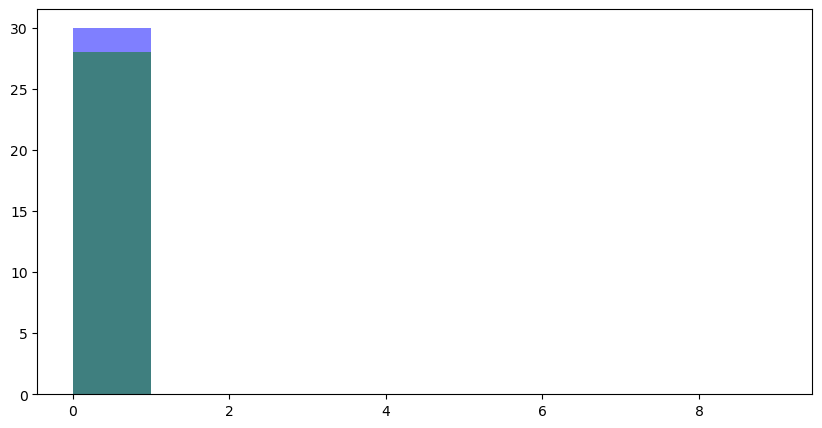

In [25]:
# Create an empty data frame.
fig, ax = plt.subplots(figsize=(10, 5)) # dont have to do subplot if just 1 plot, but can do 2 plots on 1 same axis

# Create histogram.
ax.hist(group_a, bins=range(10), color='blue', alpha=0.5, label='Group A') # alpha is transparency

# Create histogram.
ax.hist(group_b, bins=range(10), color='green', alpha=0.5, label='Group B');

# if bins=10 but the start and finish dont allign bc they start at the smallest number in each dataset
# so use range(10)

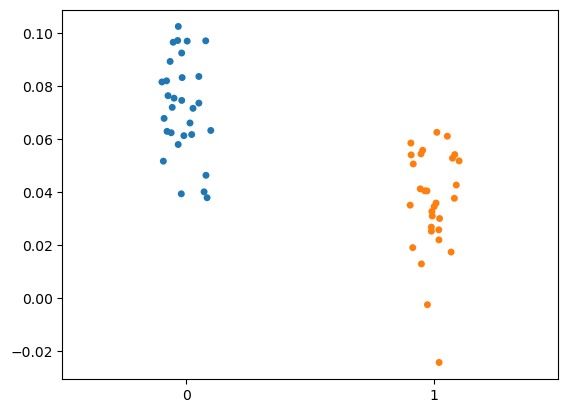

In [26]:
# Create a strip plot.
sns.stripplot(data=[group_a, group_b]);

# orage looks lower than blue, but significant overlaps too

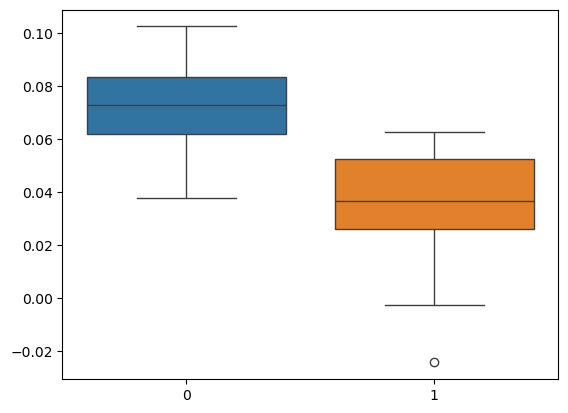

In [27]:
# Box plot.
sns.boxplot(data=[group_a, group_b]);

# order the values
# line in box is median
# box contains 50% of values, 23 higher, 25 lower
# whisker - 1.5 times from inbox height (interquartile range)
# there can be outlieers beyond whiskers

## Independent Samples $t$-Test

https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

[scipy.stats.
ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind)

**Null Hypothesis:** the population means are equal.

In [28]:
# Perform a t-test.
stats.ttest_ind(group_a, group_b)

# tvalue is dimensionless, no units
# pvalue says, whats the probability of seeing a value as extreme as 8.13?
# pvalue is so small
# so if cut off is 0.05, 
# the probability of seeing data as extreme as i've seen is < 0.05, 
# im rejecting null hypo, so means are not equal
# look at student's t probability distribution,
# most of the values are under the curve, but we are way out in the tail5
# so im going to reject the idea that we are actually in the situation where the population means are equal

TtestResult(statistic=7.4296237733596335, pvalue=5.558312220575817e-10, df=58.0)

In [29]:
# Group c.
group_c = np.random.normal(5, 2, 30)

# Group d.
group_d = np.random.normal(5, 2, 30)

# Perform a t-test.
stats.ttest_ind(group_c, group_d)

TtestResult(statistic=1.1741500482362117, pvalue=0.24513356054989954, df=58.0)

the pvalue of seeing the value as extreme as 0.5223 is 60% (higher than treshold), so we have no evidence to reject null, so means are equal

## Paired Samples $t$-Test

https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php

In [30]:
# A group of normally distributed values.
group_a = np.random.normal(5, 0.2, 30)

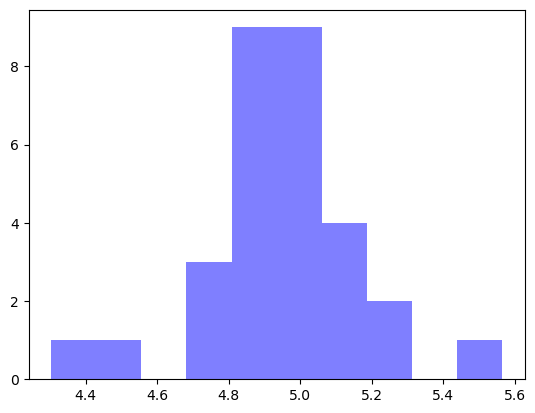

In [31]:
# Histgoram.
plt.hist(group_a, color='blue', alpha=0.5, label='Group A');

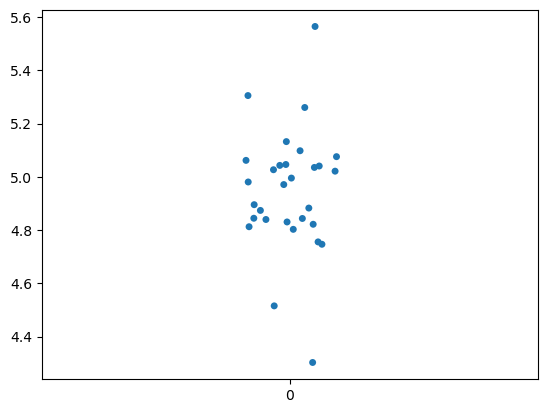

In [32]:
# Strip plot.
sns.stripplot(data=[group_a]);

In [33]:
# A group of normally distributed values.
group_a = np.random.normal(5, 0.2, 30)

# Add another normally distributed values.
group_b = group_a + np.random.normal(0.2, 0.1, 30)

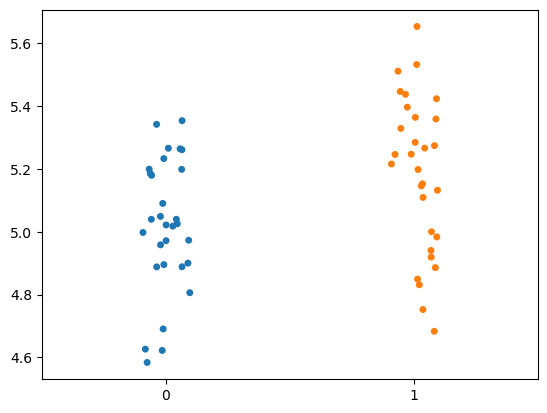

In [34]:
# Strip plot.
sns.stripplot(data=[group_a, group_b]);

### scipy.stats.ttest_rel

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel

In [35]:
# Paired samples t-test.
stats.ttest_rel(group_a, group_b)

TtestResult(statistic=-10.515326252311784, pvalue=2.085265596126171e-11, df=29)

reject null. p value is so small that it's so unlikely to see tstat value like this that i will reject null

### if u want no difference, 

In [36]:

# A group of normally distributed values.
group_a = np.random.normal(5, 0.2, 30)

# Add another normally distributed values.
group_c = group_a + np.random.normal(0.0, 0.1, 30)

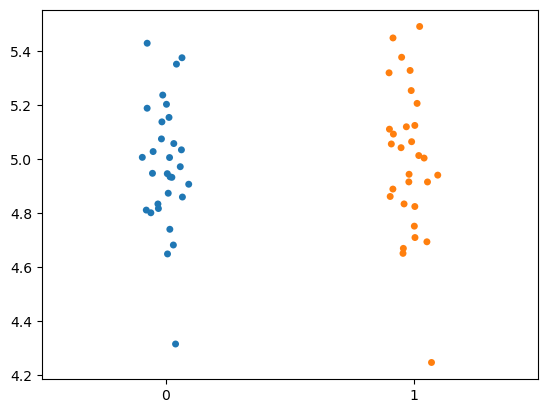

In [37]:
sns.stripplot(data=[group_a, group_c]);

In [38]:
stats.ttest_rel(group_a, group_c)

TtestResult(statistic=-0.9841785440946111, pvalue=0.33316807121349323, df=29)

theres a 79% chance of seeing a t-statistic that looks like -0.266 when the two groups have equal means.

In [39]:
# A group of normally distributed values.
group_a = np.random.normal(5, 0.2, 30)

# Add another normally distributed values.
group_d = group_a + np.random.normal(1.0, 0.1, 30)

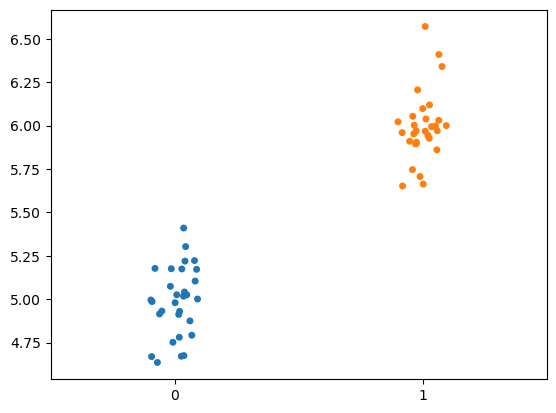

In [40]:
sns.stripplot(data=[group_a, group_d]);

In [41]:
stats.ttest_rel(group_a, group_d)

TtestResult(statistic=-48.01182483372956, pvalue=3.439379704211131e-29, df=29)

reject null. 

## End